# Questions that we need to answer with this analysis:

**How much is the cheapest house?**

A: $ 75.000,00

**How much is the most expensive house?**

A: $ 7.700.000,00

**Factors that most influence the price of the house:**

- Sqft_living
- Grade
- Bathrooms
- Sqft_above
- Sqft_living15
- View

# Conclusion:

Houses with a higher grade will cost a lot more then houses with lower grade;

If you want to have a house with more then 5 bathrooms, you'll spend a lot of money to buy it; 

Bigger houses means bigger investment to get it;

Neighboorhoods where the houses are bigger are more expensive to buy your own house.
 
-----------------------------------------------------------------------------

Note: the house that has 33 bedrooms is probably a typo, we can check that the Sqft_living is very low for so many bedrooms. Probably the autor was meaning to write 3 instead of 33.


**Variable Description**

- Id: Unique ID for each home sold
- Date: Date of the home sale
- Price: Price of each home sold
- Bedrooms: Number of bedrooms
- Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- Sqft_living: Square footage of the apartaments interior living space
- Sqft_lot: Square footage of the land space
- Floors: Number of floors
- Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
- View: An index from 0 to 4 of how good the view of the property is
- Condition: An index from 1 to 5 on the condition of the apartment
- Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- Sqft_above: The square footage of the interior housing space that is above ground level
- Sqft_basement: The square footage of the interior housing space t hat is below ground level
- Yr_built: The year the house was initially built
- Yr_renovated: The year of the house's last renovation
- Zipcode: What zipcode area the house is in
- Lat: Lattitude
- Long: Longitude
- Sqft_living15: The square footage of interior housing living space for t he nearest 15 neighbors
- Sqft_lot15: The sqare footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data['Yr_sold'] = data['date'].dt.year
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [8]:
data.iloc[data['price'].idxmin()]

id                        3421079032
date             2015-02-17 00:00:00
price                        75000.0
bedrooms                           1
bathrooms                        0.0
sqft_living                      670
sqft_lot                       43377
floors                           1.0
waterfront                         0
view                               0
condition                          3
grade                              3
sqft_above                       670
sqft_basement                      0
yr_built                        1966
yr_renovated                       0
zipcode                        98022
lat                          47.2638
long                        -121.906
sqft_living15                   1160
sqft_lot15                     42882
Yr_sold                         2015
Name: 1149, dtype: object

In [9]:
data.iloc[data['price'].idxmax()]

id                        6762700020
date             2014-10-13 00:00:00
price                      7700000.0
bedrooms                           6
bathrooms                        8.0
sqft_living                    12050
sqft_lot                       27600
floors                           2.5
waterfront                         0
view                               3
condition                          4
grade                             13
sqft_above                      8570
sqft_basement                   3480
yr_built                        1910
yr_renovated                    1987
zipcode                        98102
lat                          47.6298
long                        -122.323
sqft_living15                   3940
sqft_lot15                      8800
Yr_sold                         2014
Name: 7252, dtype: object

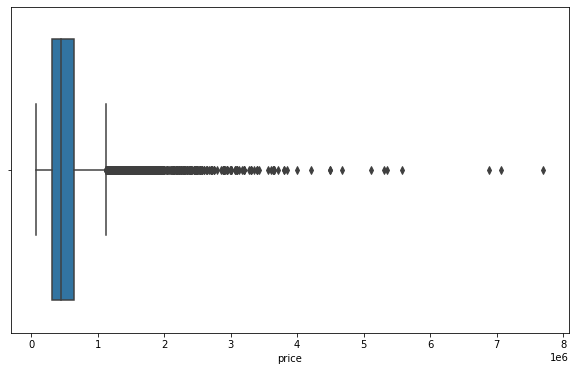

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'price')
plt.show()

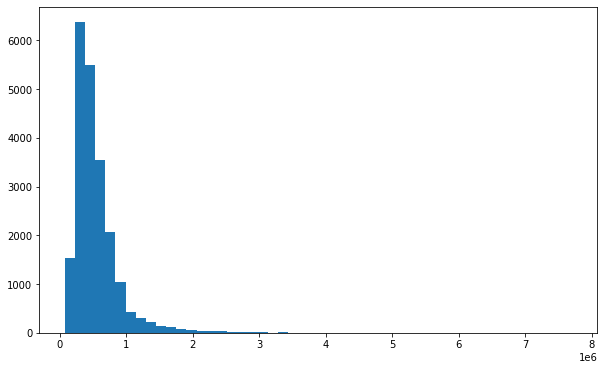

In [11]:
plt.figure(figsize=(10,6))
plt.hist(data.price, bins = 50)
plt.show()

In [12]:
corr = data.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589


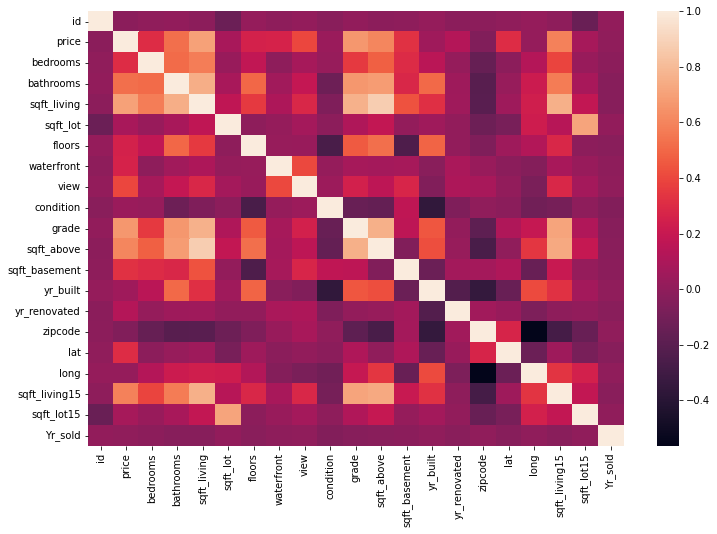

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr)

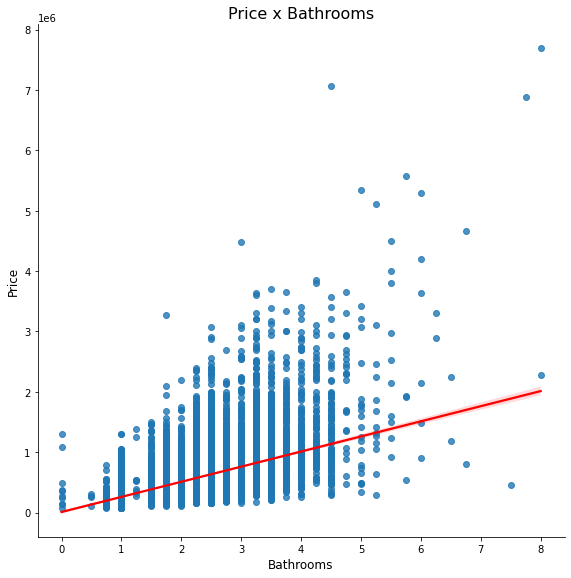

In [38]:
sns.lmplot(data = data, x = 'bathrooms', y = 'price', height= 8, line_kws={'color': 'red'})
plt.title('Price x Bathrooms', fontsize = 16)
plt.xlabel('Bathrooms', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

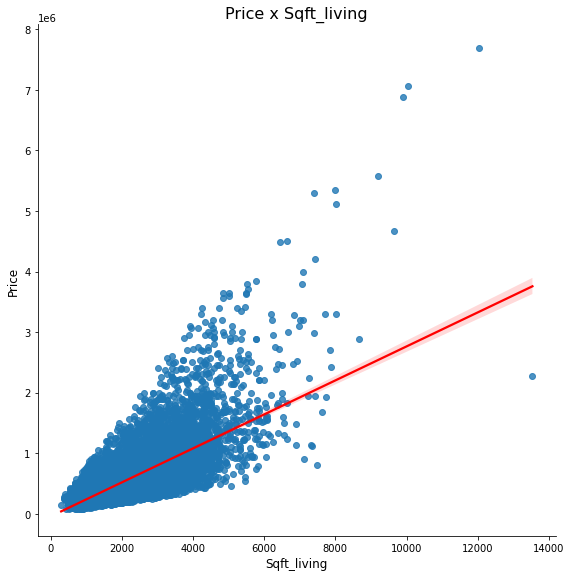

In [39]:
sns.lmplot(data = data, x = 'sqft_living', y = 'price', height= 8, line_kws={'color': 'red'})
plt.title('Price x Sqft_living', fontsize = 16)
plt.xlabel('Sqft_living', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

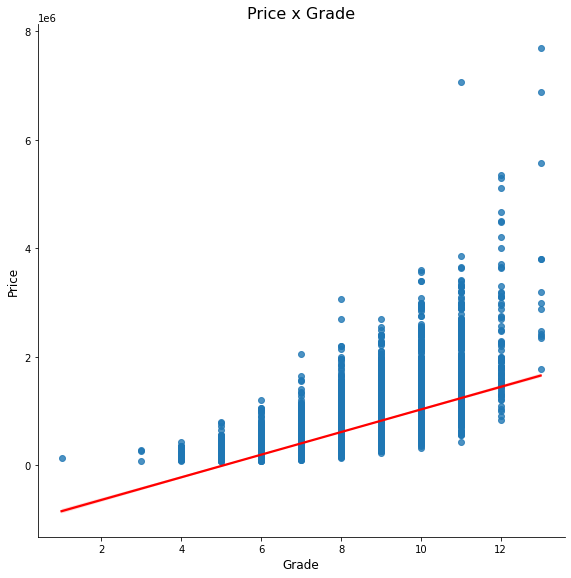

In [40]:
sns.lmplot(data = data, x = 'grade', y = 'price', height= 8, line_kws={'color': 'red'})
plt.title('Price x Grade', fontsize = 16)
plt.xlabel('Grade', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

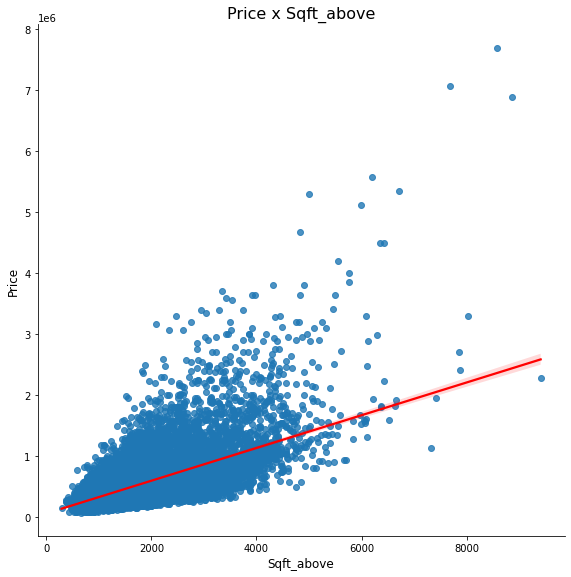

In [41]:
sns.lmplot(data = data, x = 'sqft_above', y = 'price', height= 8, line_kws={'color': 'red'})
plt.title('Price x Sqft_above', fontsize = 16)
plt.xlabel('Sqft_above', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

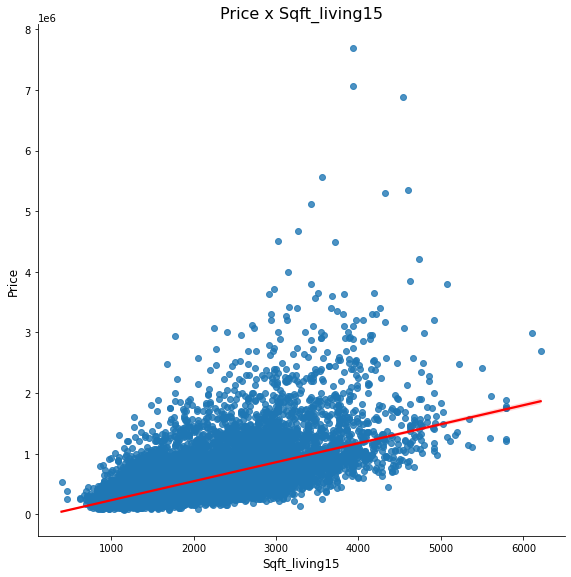

In [42]:
sns.lmplot(data = data, x = 'sqft_living15', y = 'price', height= 8, line_kws={'color': 'red'})
plt.title('Price x Sqft_living15', fontsize = 16)
plt.xlabel('Sqft_living15', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

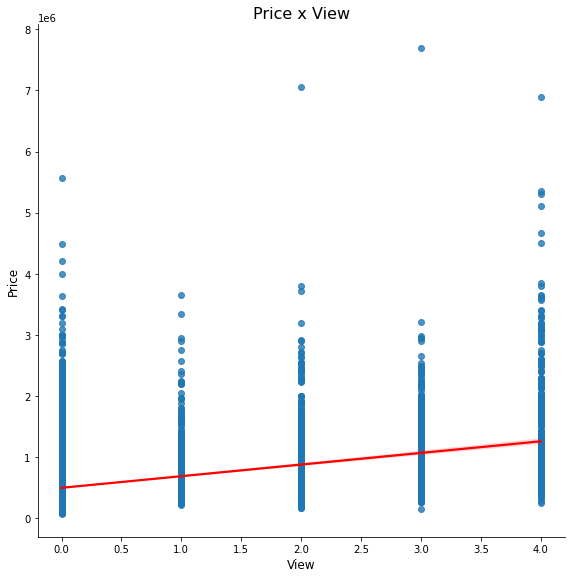

In [43]:
sns.lmplot(data = data, x = 'view', y = 'price', height= 8, line_kws={'color': 'red'})
plt.title('Price x View', fontsize = 16)
plt.xlabel('View', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

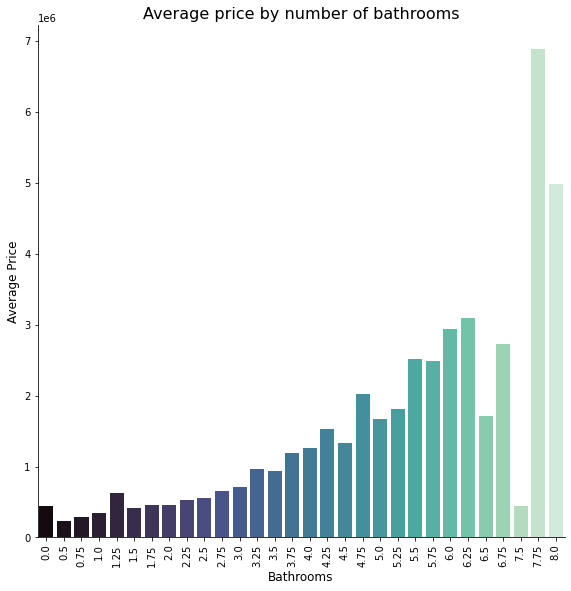

In [20]:
df_price_bath = data.groupby('bathrooms', as_index = False)['price'].mean()
ax = sns.catplot(data = df_price_bath, x = 'bathrooms', y = 'price', kind = 'bar', palette = 'mako', height= 8)
plt.xticks(rotation = 90)
plt.title('Average price by number of bathrooms', fontsize = 16)
plt.xlabel('Bathrooms', fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.show()

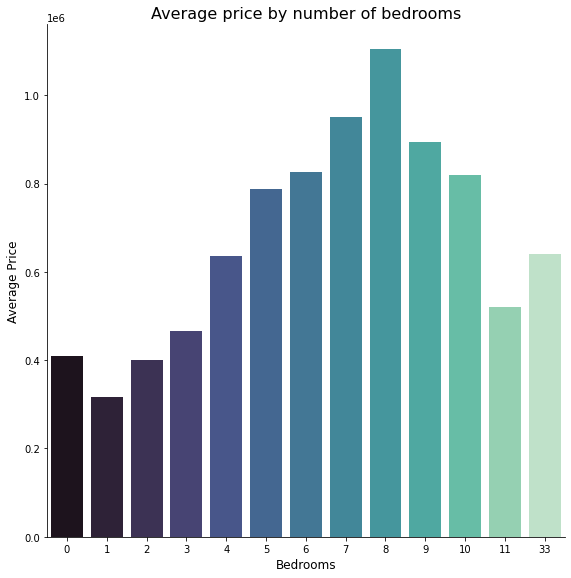

In [21]:
df_price_bath = data.groupby('bedrooms', as_index = False)['price'].mean()
ax = sns.catplot(data = df_price_bath, x = 'bedrooms', y = 'price', kind = 'bar', palette = 'mako', height= 8)
plt.title('Average price by number of bedrooms', fontsize = 16)
plt.xlabel('Bedrooms', fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.show()

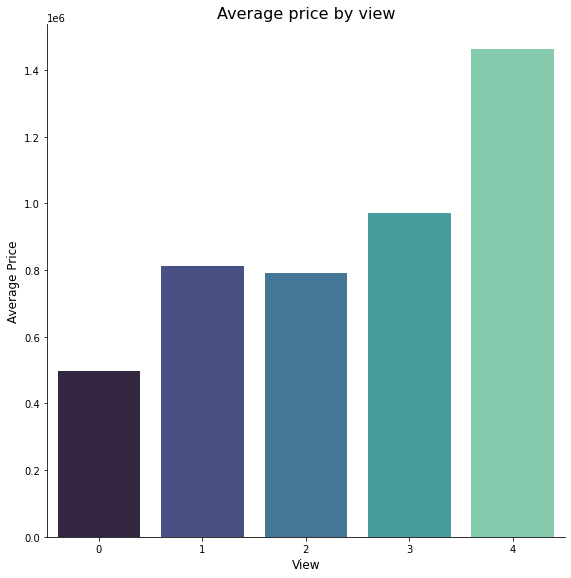

In [22]:
df_price_bath = data.groupby('view', as_index = False)['price'].mean()
ax = sns.catplot(data = df_price_bath, x = 'view', y = 'price', kind = 'bar', palette = 'mako', height= 8)
plt.title('Average price by view', fontsize = 16)
plt.xlabel('View', fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.show()

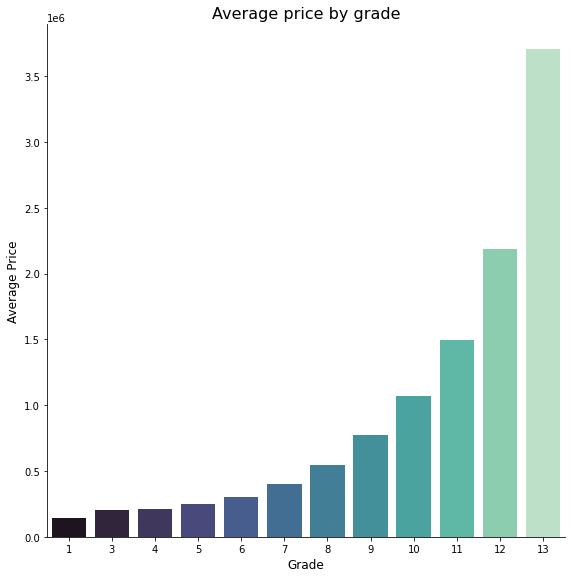

In [23]:
df_price_bath = data.groupby('grade', as_index = False)['price'].mean()
ax = sns.catplot(data = df_price_bath, x = 'grade', y = 'price', kind = 'bar', palette = 'mako', height= 8)
plt.title('Average price by grade', fontsize = 16)
plt.xlabel('Grade', fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.show()

In [44]:
built_list = []
for linha in data.yr_built:
  if linha >= 1900 and linha < 1920:
    built_list.append('1900 - 1919')
  elif linha >= 1920 and linha < 1940:
    built_list.append('1920 - 1939')
  elif linha >= 1940 and linha < 1960:
    built_list.append('1940 - 1959')
  elif linha >= 1960 and linha < 1980:
    built_list.append('1960 - 1979')
  elif linha >= 1980 and linha < 2000:
    built_list.append('1980 - 1999')
  else:
    built_list.append('2000+') 

In [45]:
data['cat_yr_built'] = built_list
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold,cat_yr_built
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1940 - 1959
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1940 - 1959
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1920 - 1939
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1960 - 1979
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1980 - 1999


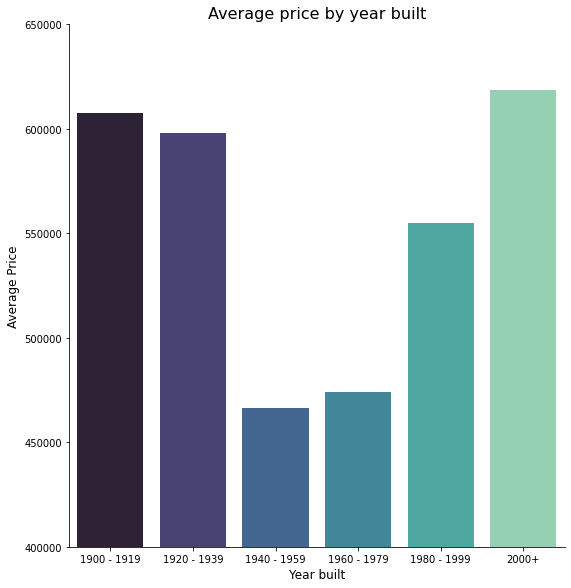

In [46]:
df_price_bath = data.groupby('cat_yr_built', as_index = False)['price'].mean()
ax = sns.catplot(data = df_price_bath, x = 'cat_yr_built', y = 'price', kind = 'bar', palette = 'mako', height= 8)
plt.title('Average price by year built', fontsize = 16)
plt.xlabel('Year built', fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
ax.set(ylim=(400000, 650000))
plt.show()

In [47]:
data.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold,cat_yr_built
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,1940 - 1959


In [50]:
data.query('bedrooms == 3')['sqft_living'].mean()

1805.8372353420195